In [5]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [6]:
data = pd.read_csv('iris.data', header=None)
data

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [7]:
data.iloc[:,1].min()

2.0

In [8]:
from sklearn.cluster import KMeans
initial_centroids = np.array([[4,2], [1,2], [2,2], [1,1]])
no_labeled_data = data.iloc[:,:4]
k_means = KMeans(init=initial_centroids, n_clusters=3, n_init=5)
k_means.fit(no_labeled_data)

E:\Python\Lib\site-packages\sklearn\cluster\_kmeans.py:1414: RuntimeWarning: Explicit initial center position passed: performing only one init in KMeans instead of n_init=5.
  super()._check_params_vs_input(X, default_n_init=10)


ValueError: The shape of the initial centers (4, 2) does not match the number of clusters 3.

In [9]:
from sklearn.metrics.pairwise import pairwise_distances_argmin 
k_means_cluster_centers = k_means.cluster_centers_ 
k_means_labels = pairwise_distances_argmin(no_labeled_data, k_means_cluster_centers)

AttributeError: 'KMeans' object has no attribute 'cluster_centers_'

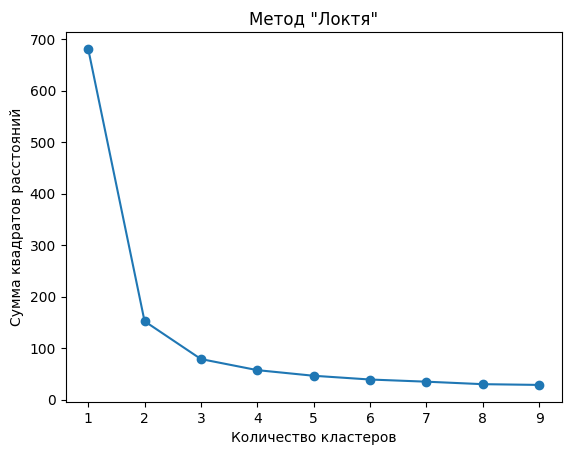

In [10]:
sse = []
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(no_labeled_data)
    sse.append(kmeans.inertia_)

plt.plot(range(1, 10), sse, marker='o')
plt.title('Метод "Локтя"')
plt.xlabel('Количество кластеров')
plt.ylabel('Сумма квадратов расстояний')
plt.show()

[<Axes: > <Axes: > <Axes: >]


NameError: name 'k_means_labels' is not defined

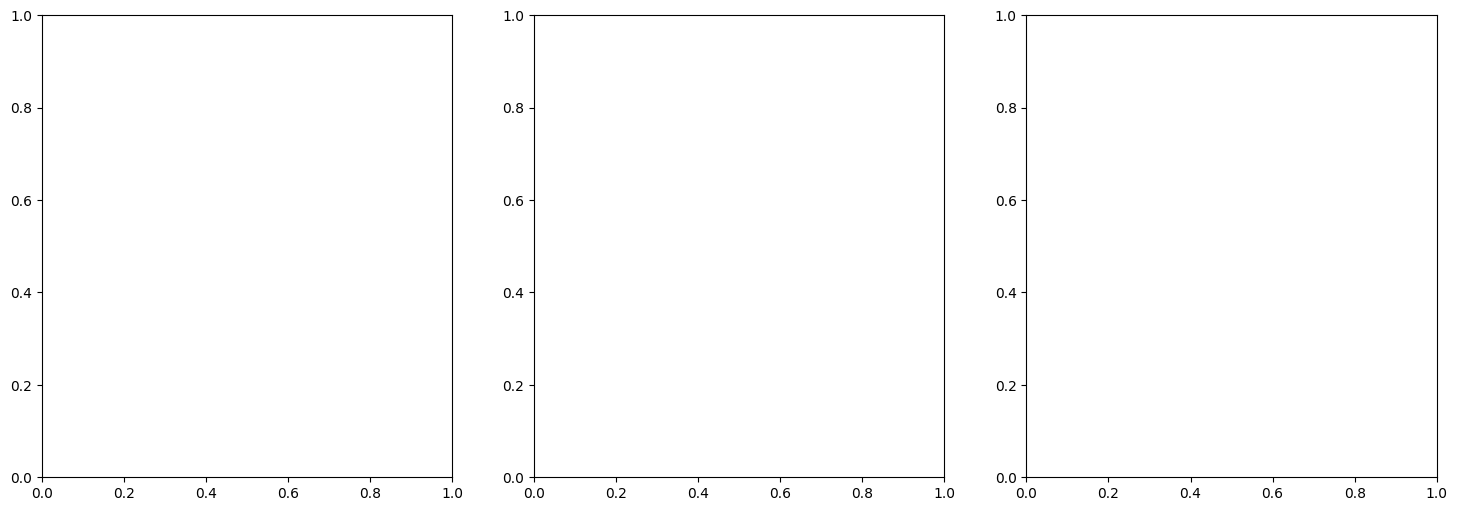

In [11]:
import matplotlib.pyplot as plt 

if isinstance(no_labeled_data, pd.DataFrame):
    no_labeled_data = no_labeled_data.values

f, ax = plt.subplots(1, 3, figsize=(18, 6)) 
colors = ['#4EACC5', '#FF9C34', '#4E9A06']
print(ax) 
for i in range(3): 
    my_members = k_means_labels == i 
    cluster_center = k_means_cluster_centers[i] 
    for j in range(3): 
        ax[j].plot(no_labeled_data[my_members, j], 
                   no_labeled_data[my_members, j+1], 
                   'w', 
                   markerfacecolor=colors[i], 
                   marker='o', markersize=5) 
        ax[j].plot(cluster_center[j], 
                   cluster_center[j+1], 
                   'o', 
                   markerfacecolor=colors[i], 
                   markeredgecolor='k', 
                   markersize=10) 
        

ax[0].set_title('Cluster visualization for Feature 1 vs Feature 2')
ax[0].set_xlabel('Feature 1')
ax[0].set_ylabel('Feature 2')

ax[1].set_title('Cluster visualization for Feature 2 vs Feature 3')
ax[1].set_xlabel('Feature 2')
ax[1].set_ylabel('Feature 3')

ax[2].set_title('Cluster visualization for Feature 3 vs Feature 4')
ax[2].set_xlabel('Feature 3')
ax[2].set_ylabel('Feature 4')

plt.show()

In [ ]:
# 4. Уменьшите размерность данных до 2 используя метод главных компонент и нарисуйте карту 
# для всей области значений, на которой каждый кластер 
# занимает определенную область со своим цветом ( как это делать) 


In [ ]:
import numpy as np

from sklearn.datasets import load_iris

data, labels = load_iris(return_X_y=True)
(n_samples, n_features), n_digits = data.shape, np.unique(labels).size

print(f"# digits: {n_digits}; # samples: {n_samples}; # features {n_features}")

In [12]:
from time import time

from sklearn import metrics
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler


def bench_k_means(kmeans, name, data, labels):
    t0 = time()
    estimator = make_pipeline(StandardScaler(), kmeans).fit(data)
    fit_time = time() - t0
    results = [name, fit_time, estimator[-1].inertia_]

    # Define the metrics which require only the true labels and estimator
    # labels
    clustering_metrics = [
        metrics.homogeneity_score,
        metrics.completeness_score,
        metrics.v_measure_score,
        metrics.adjusted_rand_score,
        metrics.adjusted_mutual_info_score,
    ]
    results += [m(labels, estimator[-1].labels_) for m in clustering_metrics]

    # The silhouette score requires the full dataset
    results += [
        metrics.silhouette_score(
            data,
            estimator[-1].labels_,
            metric="euclidean",
            sample_size=300,
        )
    ]

    # Show the results
    formatter_result = (
        "{:9s}\t{:.3f}s\t{:.0f}\t{:.3f}\t{:.3f}\t{:.3f}\t{:.3f}\t{:.3f}\t{:.3f}"
    )
    print(formatter_result.format(*results))

In [13]:
import matplotlib.pyplot as plt

reduced_data = PCA(n_components=2).fit_transform(data)
kmeans = KMeans(init="k-means++", n_clusters=n_digits, n_init=4)
kmeans.fit(reduced_data)

# Step size of the mesh. Decrease to increase the quality of the VQ.
h = 0.02  # point in the mesh [x_min, x_max]x[y_min, y_max].

# Plot the decision boundary. For that, we will assign a color to each
x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Obtain labels for each point in mesh. Use last trained model.
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1)
plt.clf()
plt.imshow(
    Z,
    interpolation="nearest",
    extent=(xx.min(), xx.max(), yy.min(), yy.max()),
    cmap=plt.cm.Paired,
    aspect="auto",
    origin="lower",
)

plt.plot(reduced_data[:, 0], reduced_data[:, 1], "k.", markersize=2)
# Plot the centroids as a white X
centroids = kmeans.cluster_centers_
plt.scatter(
    centroids[:, 0],
    centroids[:, 1],
    marker="x",
    s=169,
    linewidths=3,
    color="w",
    zorder=10,
)
plt.title(
    "K-means clustering on the digits dataset (PCA-reduced data)\n"
    "Centroids are marked with white cross"
)
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()

NameError: name 'PCA' is not defined

E:\Python\Lib\site-packages\sklearn\cluster\_kmeans.py:1414: RuntimeWarning: Explicit initial center position passed: performing only one init in KMeans instead of n_init=5.
  super()._check_params_vs_input(X, default_n_init=10)


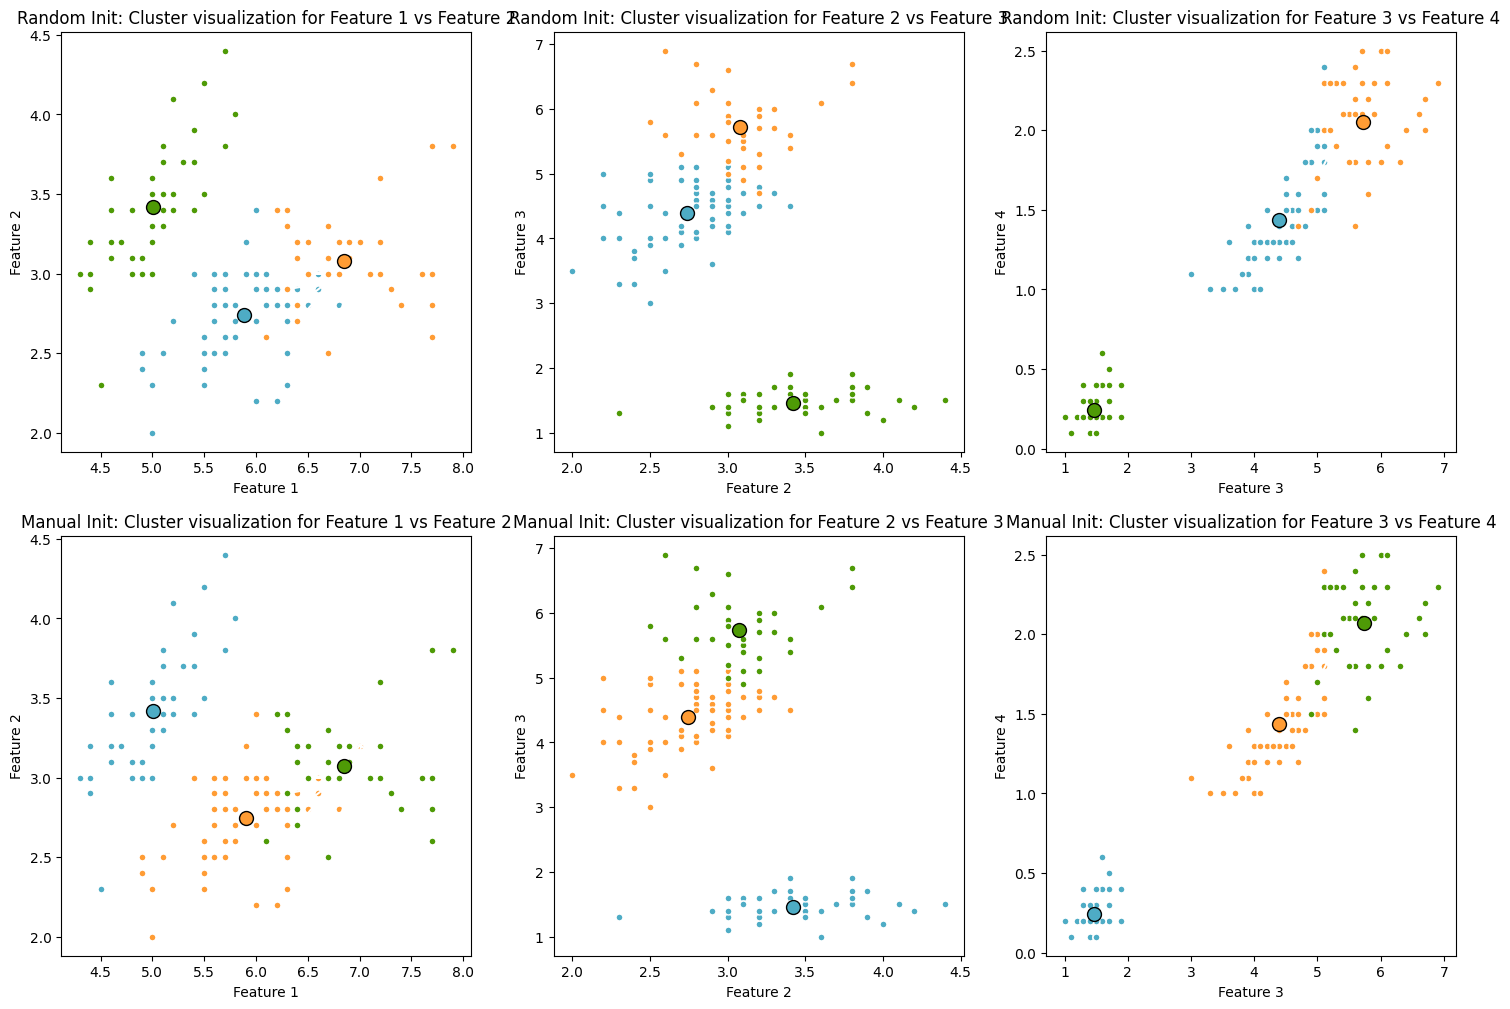

In [14]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics.pairwise import pairwise_distances_argmin
import matplotlib.pyplot as plt

# Пример данных
# data = pd.read_csv('data.csv') # Замените на ваши данные

# Исключение лейблов, если они имеются
no_labeled_data = data.iloc[:, :4]

# Сначала используем 'random' инициализацию
n_clusters = 3
n_init = 5

random_kmeans = KMeans(init='random', n_clusters=n_clusters, n_init=n_init)
random_kmeans.fit(no_labeled_data)

random_cluster_centers = random_kmeans.cluster_centers_
random_labels = pairwise_distances_argmin(no_labeled_data, random_cluster_centers)

# Ручная инициализация с учетом 4 признаков
initial_centroids = np.array([[4, 2, 1, 3], [1, 2, 3, 4], [2, 2, 2, 2]])  # Изменено на 4 признака

manual_kmeans = KMeans(init=initial_centroids, n_clusters=n_clusters, n_init=n_init)
manual_kmeans.fit(no_labeled_data)

manual_cluster_centers = manual_kmeans.cluster_centers_
manual_labels = pairwise_distances_argmin(no_labeled_data, manual_cluster_centers)

# Отображение результатов
f, ax = plt.subplots(2, 3, figsize=(18, 12))
colors = ['#4EACC5', '#FF9C34', '#4E9A06']

if isinstance(no_labeled_data, pd.DataFrame):
    no_labeled_data = no_labeled_data.values

for kmeans_result, clusters_centers, labels, row_idx in zip(
        ["Random Init", "Manual Init"],
        [random_cluster_centers, manual_cluster_centers],
        [random_labels, manual_labels],
        [0, 1]):
    
    for i in range(n_clusters):
        my_members = labels == i
        cluster_center = clusters_centers[i] 
        for j in range(3):
            ax[row_idx, j].plot(no_labeled_data[my_members, j], 
                                no_labeled_data[my_members, j+1], 
                                'w', 
                                markerfacecolor=colors[i], 
                                marker='o', markersize=5)
            ax[row_idx, j].plot(cluster_center[j], 
                                cluster_center[j+1], 
                                'o', 
                                markerfacecolor=colors[i], 
                                markeredgecolor='k', 
                                markersize=10)
                                
# Настройка заголовков и меток
titles = [
    'Cluster visualization for Feature 1 vs Feature 2',
    'Cluster visualization for Feature 2 vs Feature 3',
    'Cluster visualization for Feature 3 vs Feature 4'
]

for i in range(3):
    ax[0, i].set_title(f'Random Init: {titles[i]}')
    ax[1, i].set_title(f'Manual Init: {titles[i]}')

    ax[0, i].set_xlabel(f'Feature {i+1}')
    ax[0, i].set_ylabel(f'Feature {i+2}')
    
    ax[1, i].set_xlabel(f'Feature {i+1}')
    ax[1, i].set_ylabel(f'Feature {i+2}')

plt.show()


In [15]:
# 7.

k_means = KMeans(init="k-means++", n_clusters=3, n_init=10)
k_means.fit(no_labeled_data)

KMeans(n_clusters=3, n_init=10)

In [16]:
from sklearn.cluster import MiniBatchKMeans
batch_size = 45
mbk = MiniBatchKMeans(
    init="k-means++",
    n_clusters=3,
    batch_size=batch_size,
    n_init=10,
    max_no_improvement=10,
    verbose=0,
)

mbk.fit(no_labeled_data)

MiniBatchKMeans(batch_size=45, n_clusters=3, n_init=10)

In [17]:
from sklearn.metrics.pairwise import pairwise_distances_argmin

k_means_cluster_centers = k_means.cluster_centers_
order = pairwise_distances_argmin(k_means.cluster_centers_, mbk.cluster_centers_)
mbk_means_cluster_centers = mbk.cluster_centers_[order]

k_means_labels = pairwise_distances_argmin(no_labeled_data, k_means_cluster_centers)
mbk_means_labels = pairwise_distances_argmin(no_labeled_data, mbk_means_cluster_centers)

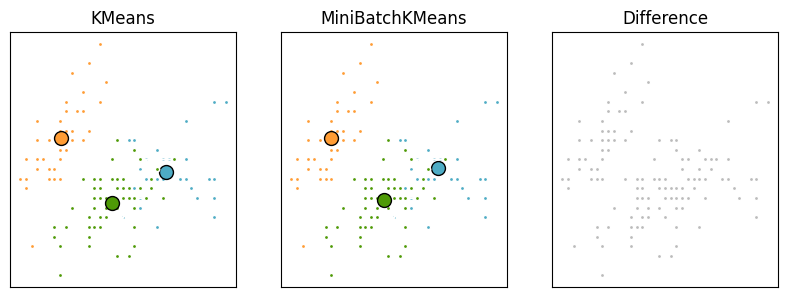

In [18]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(8, 3))
fig.subplots_adjust(left=0.02, right=0.98, bottom=0.05, top=0.9)
colors = ["#4EACC5", "#FF9C34", "#4E9A06"]

# KMeans
ax = fig.add_subplot(1, 3, 1)
for k, col in zip(range(n_clusters), colors):
    my_members = k_means_labels == k
    cluster_center = k_means_cluster_centers[k]
    ax.plot(no_labeled_data[my_members, 0], no_labeled_data[my_members, 1], "w", markerfacecolor=col, marker=".")
    ax.plot(
        cluster_center[0],
        cluster_center[1],
        "o",
        markerfacecolor=col,
        markeredgecolor="k",
        markersize=10,
    )
ax.set_title("KMeans")
ax.set_xticks(())
ax.set_yticks(())


# MiniBatchKMeans
ax = fig.add_subplot(1, 3, 2)
for k, col in zip(range(n_clusters), colors):
    my_members = mbk_means_labels == k
    cluster_center = mbk_means_cluster_centers[k]
    ax.plot(no_labeled_data[my_members, 0], no_labeled_data[my_members, 1], "w", markerfacecolor=col, marker=".")
    ax.plot(
        cluster_center[0],
        cluster_center[1],
        "o",
        markerfacecolor=col,
        markeredgecolor="k",
        markersize=10,
    )
ax.set_title("MiniBatchKMeans")
ax.set_xticks(())
ax.set_yticks(())


# Initialize the different array to all False
different = mbk_means_labels == 4
ax = fig.add_subplot(1, 3, 3)

for k in range(n_clusters):
    different += (k_means_labels == k) != (mbk_means_labels == k)

identical = np.logical_not(different)
ax.plot(no_labeled_data[identical, 0], no_labeled_data[identical, 1], "w", markerfacecolor="#bbbbbb", marker=".")
ax.plot(no_labeled_data[different, 0], no_labeled_data[different, 1], "w", markerfacecolor="m", marker=".")
ax.set_title("Difference")
ax.set_xticks(())
ax.set_yticks(())

plt.show()

# Иерархическая кластеризация

In [40]:
# 1.

from sklearn.cluster import AgglomerativeClustering 
hier = AgglomerativeClustering(n_clusters=5, linkage='average') 
hier = hier.fit(no_labeled_data) 
hier_labels = hier.labels_

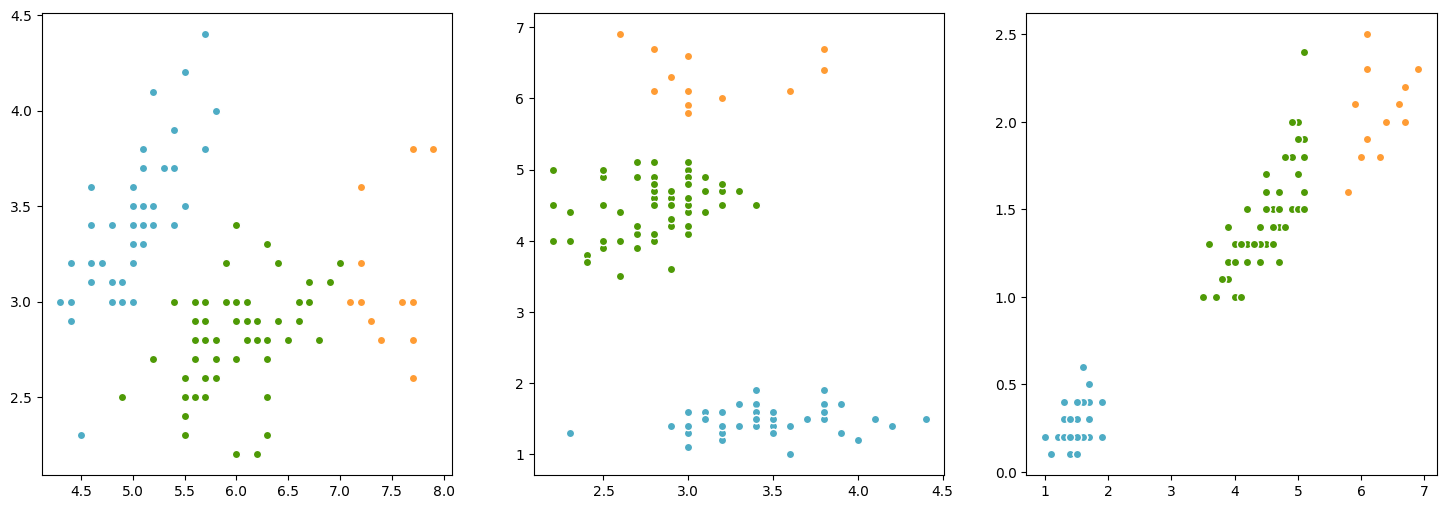

In [41]:
f, ax = plt.subplots(1, 3, figsize=(18, 6)) 
colors = ['#4EACC5', '#FF9C34', '#4E9A06'] 
for i in range(3): 
    my_members = hier_labels == i 
    for j in range(3): 
        ax[j].plot(no_labeled_data[my_members, j], 
                   no_labeled_data[my_members, j+1], 
                   'w', markerfacecolor=colors[i], 
                   marker='o', markersize=6) 
plt.show()

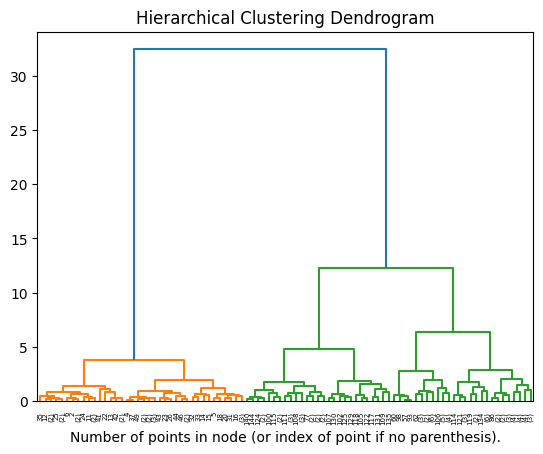

In [49]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram

from sklearn.cluster import AgglomerativeClustering
from sklearn.datasets import load_iris


def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)


iris = load_iris()
X = iris.data

# setting distance_threshold=0 ensures we compute the full tree.
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None)

model = model.fit(X)
plt.title("Hierarchical Clustering Dendrogram")
# plot the top three levels of the dendrogram
plot_dendrogram(model, truncate_mode="level", p=6)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()

In [50]:
import random 
import math
data1 = np.zeros([250,2]) 
for i in range(250):
    r = random.uniform(1, 3)
    a = random.uniform(0, 2 * math.pi)
    data1[i,0] = r * math.sin(a)
    data1[i,1] = r * math.cos(a) 

data2 = np.zeros([500,2]) 
for i in range(500): 
    r = random.uniform(5, 9) 
    a = random.uniform(0, 2 * math.pi) 
    data2[i,0] = r * math.sin(a) 
    data2[i,1] = r * math.cos(a) 

data = np.vstack((data1, data2))

In [71]:
hier = AgglomerativeClustering(n_clusters=2, linkage='single') 
hier = hier.fit(data) 
hier_labels = hier.labels_

C:\Users\krum1\AppData\Local\Temp\ipykernel_5972\286940485.py:2: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "w" (-> color=(1.0, 1.0, 1.0, 1)). The keyword argument will take precedence.
  plt.plot(data[my_members, 0],
C:\Users\krum1\AppData\Local\Temp\ipykernel_5972\286940485.py:12: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "w" (-> color=(1.0, 1.0, 1.0, 1)). The keyword argument will take precedence.
  plt.plot(data[my_members, 0],


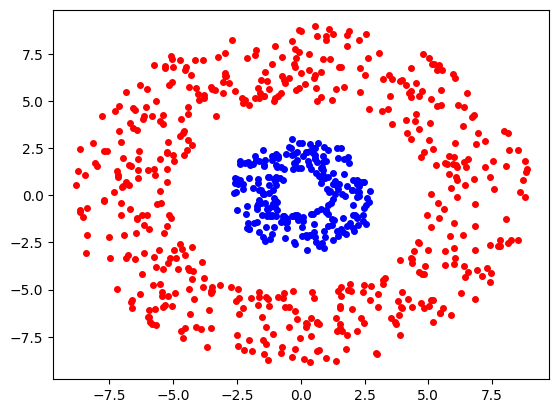

In [72]:
my_members = hier_labels == 0 
plt.plot(data[my_members, 0], 
         data[my_members, 1], 
         'w', 
         marker='o', 
         markersize=4, 
         color='red',
         linestyle='None') 

my_members = hier_labels == 1 

plt.plot(data[my_members, 0], 
         data[my_members, 1], 
         'w', 
         marker='o', 
         markersize=4, 
         color='blue',
         linestyle='None') 

plt.show()